In [2]:
import pandas as pd
import numpy as np
import os
from pandas import Series, DataFrame, Panel
from datetime import datetime

In [3]:
import plotly.plotly as py
import cufflinks as cf

In [4]:
from matplotlib import pyplot

In [5]:
filename = './data/unhashed/russia_201901_1_tweets_csv_unhashed.csv'

In [6]:
russia = pd.read_csv(filename, dtype = {
    "tweetid": str,
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
    "tweet_text": str,
    "tweet_time": str,
    "tweet_client_name": str,
    "in_reply_to_tweetid": str,
    "in_reply_to_userid": str,
    "quoted_tweet_tweetid": str,
    "is_retweet": bool,
    "retweet_userid": str,
    "retweet_tweetid": str,
    "latitude": str,
    "longitude": str,
    "quote_count": str,
    "reply_count": str,
    "like_count": str,
    "retweet_count": str,
    "hashtags": str,
    "urls": str,
    "user_mentions": str,
    "poll_choices": str,
})

In [7]:
print(len(russia))

765246


In [8]:
russia.columns


Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_text', 'tweet_time',
       'tweet_client_name', 'in_reply_to_tweetid', 'in_reply_to_userid',
       'quoted_tweet_tweetid', 'is_retweet', 'retweet_userid',
       'retweet_tweetid', 'latitude', 'longitude', 'quote_count',
       'reply_count', 'like_count', 'retweet_count', 'hashtags', 'urls',
       'user_mentions', 'poll_choices'],
      dtype='object')

In [9]:
#russia['tweet_time']

In [9]:
russia['tweet_record_time'] = pd.to_datetime(russia['tweet_time'], format ='%Y-%m-%d %H:%M')

In [ ]:
#russia['tweet_record_time']

In [10]:
time = []

In [11]:
for i in russia['tweet_record_time']:
    time.append(i.time())
    #print(i.time())

In [12]:
russia['time'] = time

In [13]:
hour =[]

In [14]:
for i in russia['time']:
    hour.append(i.hour)
    #print(i.time())

In [15]:
russia['hour'] = hour

In [18]:
#russia.longtitude

In [32]:
#cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

#russia.iplot(x='time',kind='scatter') 

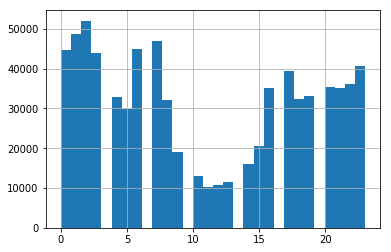

In [16]:
russia['hour'].hist(bins = 30)

In [17]:
import numpy as np; np.random.seed(10)
import seaborn as sns;

In [31]:
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

In [18]:
sns.set()

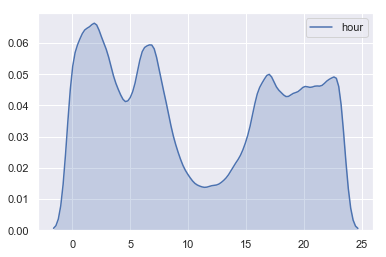

In [19]:
sns.kdeplot(russia['hour'], shade=True)

In [31]:
#russia['hour'].plot()
#pyplot.show()

In [20]:
def processHour(filename = None):
    df = pd.read_csv(filename, dtype = {
        "tweetid": str,
        "userid": str,
        "user_display_name": str,
        "user_screen_name": str,
        "user_reported_location": str,
        "user_profile_description": str,
        "user_profile_url": str,
        "follower_count": str,
        "following_count": str,
        "account_creation_date": str,
        "account_language": str,
        "tweet_text": str,
        "tweet_time": str,
        "tweet_client_name": str,
        "in_reply_to_tweetid": str,
        "in_reply_to_userid": str,
        "quoted_tweet_tweetid": str,
        "is_retweet": bool,
        "retweet_userid": str,
        "retweet_tweetid": str,
        "latitude": str,
        "longitude": str,
        "quote_count": str,
        "reply_count": str,
        "like_count": str,
        "retweet_count": str,
        "hashtags": str,
        "urls": str,
        "user_mentions": str,
        "poll_choices": str,
    })
    
    df['tweet_record_time'] = pd.to_datetime(df['tweet_time'], format ='%Y-%m-%d %H:%M')


    time = []

    for i in df['tweet_record_time']:
        time.append(i.time())

    df['time'] = time


    hour =[]


    for i in df['time']:
        hour.append(i.hour)
     

    df['hour'] = hour

    return df

In [21]:
filename = './data/unhashed/iranian_tweets_csv_unhashed.csv'
iranian = processHour(filename)

In [23]:
# filename = './data/unhashed/venezuela_201901_2_tweets_csv_unhashed.csv'
# venezuala_two = processHour(filename)

In [24]:
filename = './data/unhashed/bangladesh_201901_1_tweets_csv_unhashed.csv'
bangladesh = processHour(filename)

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

In [39]:
russia['hour'].unique()

array([ 9, 22, 19,  1,  6, 17,  5, 16, 20,  7,  2,  4, 14, 21, 18, 23,  3,
       15, 13,  8,  0, 10, 12, 11], dtype=int64)

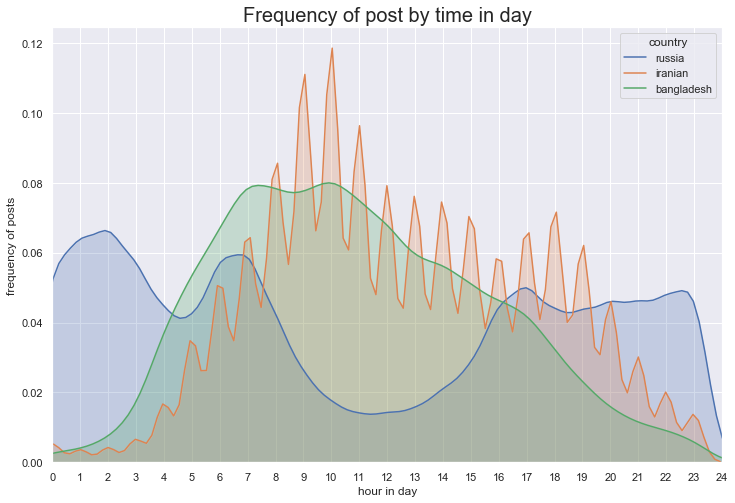

In [44]:
sns.set()
    
    
g = sns.kdeplot(russia['hour'], shade=True)
g = sns.kdeplot(iranian['hour'], shade=True)
g = sns.kdeplot(bangladesh['hour'], shade=True)

# legend = g._legend
# legend.set_title("Frequency of post by time in day")
# for t, l in zip(legend.texts,('russia', 'iranian', 'bangladesh')):
#     t.set_text(l)


# new_title = 'Frequency of post by time in day'
# leg.set_title(new_title)
# new_labels = ['russia', 'iranian', 'bangladesh']
# for t, l in zip(leg.texts, new_labels): t.set_text(l)

axes = plt.gca()
axes.set_xlim([0,24])

plt.xlabel('hour in day')
plt.ylabel('frequency of posts')
plt.xticks(np.arange(0,25, step = 1))
plt.title('Frequency of post by time in day', fontsize=20)
plt.legend(title='country', loc='upper right', labels=['russia', 'iranian', 'bangladesh'])
plt.show(g)

In [45]:
russia['country'] = 'russia'
iranian['country'] = 'iranian'
bangladesh['country'] = 'bangladesh'

In [53]:
#iranian.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices,tweet_record_time,time,hour,country
0,918741290078138368,867065768973713408,Contra el Trumpismo,ContraTrumpismo,"Caracas, Venezuela",Todo el mundo es lleno de los Crímenes de EEUU...,NaN,1962,2054,2017-05-23,...,0.0,0.0,[EEUU],[],[],NaN,2017-10-13 07:32:00,07:32:00,7,iranian
1,954286721633529856,867065768973713408,Contra el Trumpismo,ContraTrumpismo,"Caracas, Venezuela",Todo el mundo es lleno de los Crímenes de EEUU...,NaN,1962,2054,2017-05-23,...,4.0,3.0,[Corea_del_Norte],[],[],NaN,2018-01-19 09:37:00,09:37:00,9,iranian
2,913429163025010688,867065768973713408,Contra el Trumpismo,ContraTrumpismo,"Caracas, Venezuela",Todo el mundo es lleno de los Crímenes de EEUU...,NaN,1962,2054,2017-05-23,...,0.0,0.0,[Seúl],[],[867065768973713408],NaN,2017-09-28 15:44:00,15:44:00,15,iranian
3,406699069038292993,1443219385,Whatsupic,Whatsupic,United Kingdom,Unbiased News Reported by Users along our Own ...,http://t.co/ziSrivGi68,2364,1160,2013-05-20,...,0.0,0.0,[Gaza],[http://whatsupic.com/news-politics-world/1385...,NaN,NaN,2013-11-30 08:19:00,08:19:00,8,iranian
4,383923374436515841,1443219385,Whatsupic,Whatsupic,United Kingdom,Unbiased News Reported by Users along our Own ...,http://t.co/ziSrivGi68,2364,1160,2013-05-20,...,0.0,0.0,"[Mexico, JavierHernandez]",[http://whatsupic.com/sports-mexico/3180-mexic...,NaN,NaN,2013-09-28 11:57:00,11:57:00,11,iranian


In [54]:
russia.to_csv("rus_tweet.csv")

In [55]:
russia.to_csv("all_tweet.csv")

In [56]:
bangladesh.to_csv("bang_tweet.csv")

In [58]:
bangladesh.to_csv("all_tweet.csv", mode='a')

In [59]:
iranian.to_csv("iran_tweet.csv")

In [60]:
iranian.to_csv("all_tweet.csv", mode='a')